Task 2:- ...........a) Data Loading & Exploration

In [2]:
import pandas as pd
df = pd.read_csv('owid-covid-data.csv')
print(df)

       iso_code continent     location        date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan  2020-01-03          NaN        0.0   
1           AFG      Asia  Afghanistan  2020-01-04          NaN        0.0   
2           AFG      Asia  Afghanistan  2020-01-05          NaN        0.0   
3           AFG      Asia  Afghanistan  2020-01-06          NaN        0.0   
4           AFG      Asia  Afghanistan  2020-01-07          NaN        0.0   
...         ...       ...          ...         ...          ...        ...   
350080      ZWE    Africa     Zimbabwe  2023-10-14     265808.0        0.0   
350081      ZWE    Africa     Zimbabwe  2023-10-15     265808.0        0.0   
350082      ZWE    Africa     Zimbabwe  2023-10-16     265808.0        0.0   
350083      ZWE    Africa     Zimbabwe  2023-10-17     265808.0        0.0   
350084      ZWE    Africa     Zimbabwe  2023-10-18     265808.0        0.0   

        new_cases_smoothed  total_deaths  new_deaths  new_death

b)Check columns

In [4]:
df.columns = df.columns.str.replace(' ', '_')
print(df.columns)

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

c)Preview rows

In [5]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


d)Identify missing values

In [6]:
df.isnull().sum()

iso_code                                        0
continent                                   16665
location                                        0
date                                            0
total_cases                                 37997
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       337901
excess_mortality_cumulative                337901
excess_mortality                           337901
excess_mortality_cumulative_per_million    337901
Length: 67, dtype: int64

Task 3:-Data Cleaning......a)Filter countries of interest

In [7]:
# List of countries of interest
countries_of_interest = ['United States', 'India', 'Brazil', 'Russia', 'United Kingdom']

# Filter the dataframe
filtered_df = df.loc[df['location'].isin(countries_of_interest)]
print(filtered_df)

       iso_code      continent       location        date  total_cases  \
41567       BRA  South America         Brazil  2020-01-03          NaN   
41568       BRA  South America         Brazil  2020-01-04          NaN   
41569       BRA  South America         Brazil  2020-01-05          NaN   
41570       BRA  South America         Brazil  2020-01-06          NaN   
41571       BRA  South America         Brazil  2020-01-07          NaN   
...         ...            ...            ...         ...          ...   
330861      USA  North America  United States  2023-10-14  103436829.0   
330862      USA  North America  United States  2023-10-15  103436829.0   
330863      USA  North America  United States  2023-10-16  103436829.0   
330864      USA  North America  United States  2023-10-17  103436829.0   
330865      USA  North America  United States  2023-10-18  103436829.0   

        new_cases  new_cases_smoothed  total_deaths  new_deaths  \
41567         0.0                 NaN       

b)Drop rows with missing dates/critical values.

In [9]:
# Drop rows with missing values in critical columns
critical_columns = ['date', 'total_cases', 'total_deaths']
filtered_df = filtered_df.dropna(subset=critical_columns)
print(filtered_df)

       iso_code      continent       location        date  total_cases  \
41643       BRA  South America         Brazil  2020-03-19        291.0   
41644       BRA  South America         Brazil  2020-03-20        428.0   
41645       BRA  South America         Brazil  2020-03-21        428.0   
41646       BRA  South America         Brazil  2020-03-22        904.0   
41647       BRA  South America         Brazil  2020-03-23        904.0   
...         ...            ...            ...         ...          ...   
330861      USA  North America  United States  2023-10-14  103436829.0   
330862      USA  North America  United States  2023-10-15  103436829.0   
330863      USA  North America  United States  2023-10-16  103436829.0   
330864      USA  North America  United States  2023-10-17  103436829.0   
330865      USA  North America  United States  2023-10-18  103436829.0   

        new_cases  new_cases_smoothed  total_deaths  new_deaths  \
41643        57.0              36.714       

c)Convert date column to datetime: pd.to_datetime().

In [10]:
filtered_df['date'] = pd.to_datetime(filtered_df['date'])
print(filtered_df['date'].dtypes)

datetime64[ns]


d)Handle missing numeric values with fillna() or interpolate()

In [11]:
# Fill missing numeric values with interpolation
filtered_df = filtered_df.interpolate(method='linear', limit_direction='forward', axis=0)

# Alternatively, fill missing values with a specific value (e.g., 0)
# filtered_df = filtered_df.fillna(0)

print(filtered_df.isnull().sum())

iso_code                                    0
continent                                   0
location                                    0
date                                        0
total_cases                                 0
                                           ..
population                                  0
excess_mortality_cumulative_absolute       12
excess_mortality_cumulative                12
excess_mortality                           12
excess_mortality_cumulative_per_million    12
Length: 67, dtype: int64


C:\Users\IGNATIUS MAINGI\AppData\Local\Temp\ipykernel_16416\3877942980.py:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  filtered_df = filtered_df.interpolate(method='linear', limit_direction='forward', axis=0)


Task 4:- Exploratory Data Analysis (EDA).....a)Plot total cases over time for selected countries.(Line charts (cases & deaths over time).)

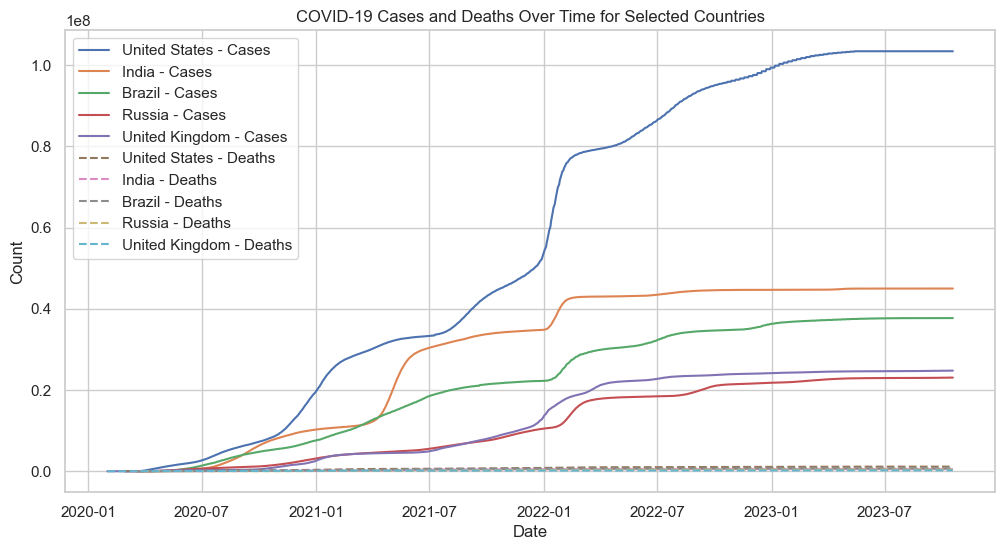

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# Plot total cases over time for each country
plt.figure(figsize=(12, 6))
for country in countries_of_interest:
    country_data = filtered_df[filtered_df['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=f"{country} - Cases")

# Plot total deaths over time for each country
for country in countries_of_interest:
    country_data = filtered_df[filtered_df['location'] == country]
    plt.plot(country_data['date'], country_data['total_deaths'], linestyle='--', label=f"{country} - Deaths")

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('COVID-19 Cases and Deaths Over Time for Selected Countries')
plt.legend()
plt.grid(True)
plt.show()

b)Bar charts (top countries by total cases).

C:\Users\IGNATIUS MAINGI\AppData\Local\Temp\ipykernel_16416\1669451045.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")


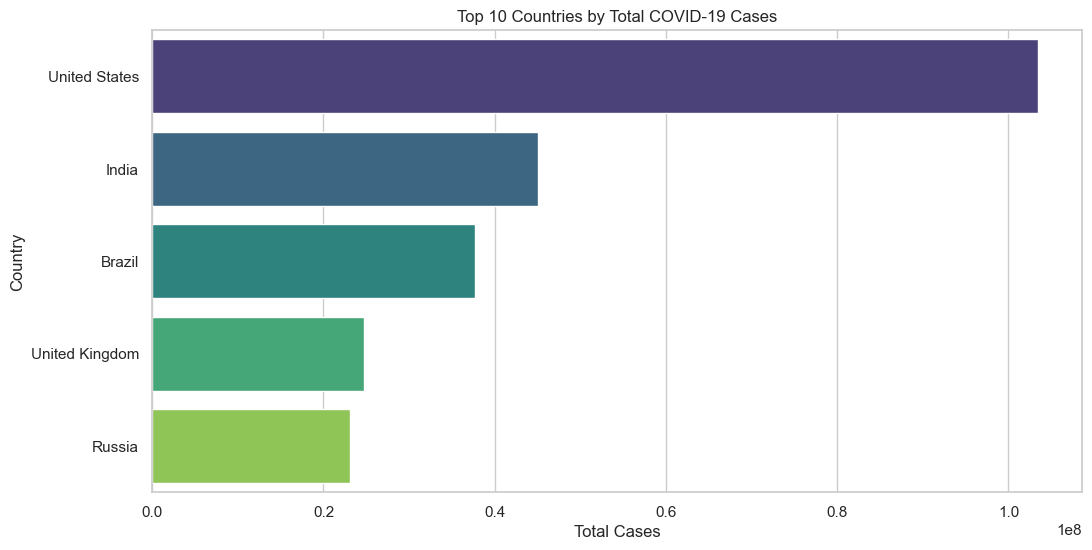

In [16]:
# Group by location and calculate the maximum total cases for each country
top_countries = filtered_df.groupby('location')['total_cases'].max().sort_values(ascending=False).head(10)

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")
plt.xlabel('Total Cases')
plt.ylabel('Country')
plt.title('Top 10 Countries by Total COVID-19 Cases')
plt.show()

c)Heatmaps (optional for correlation analysis).

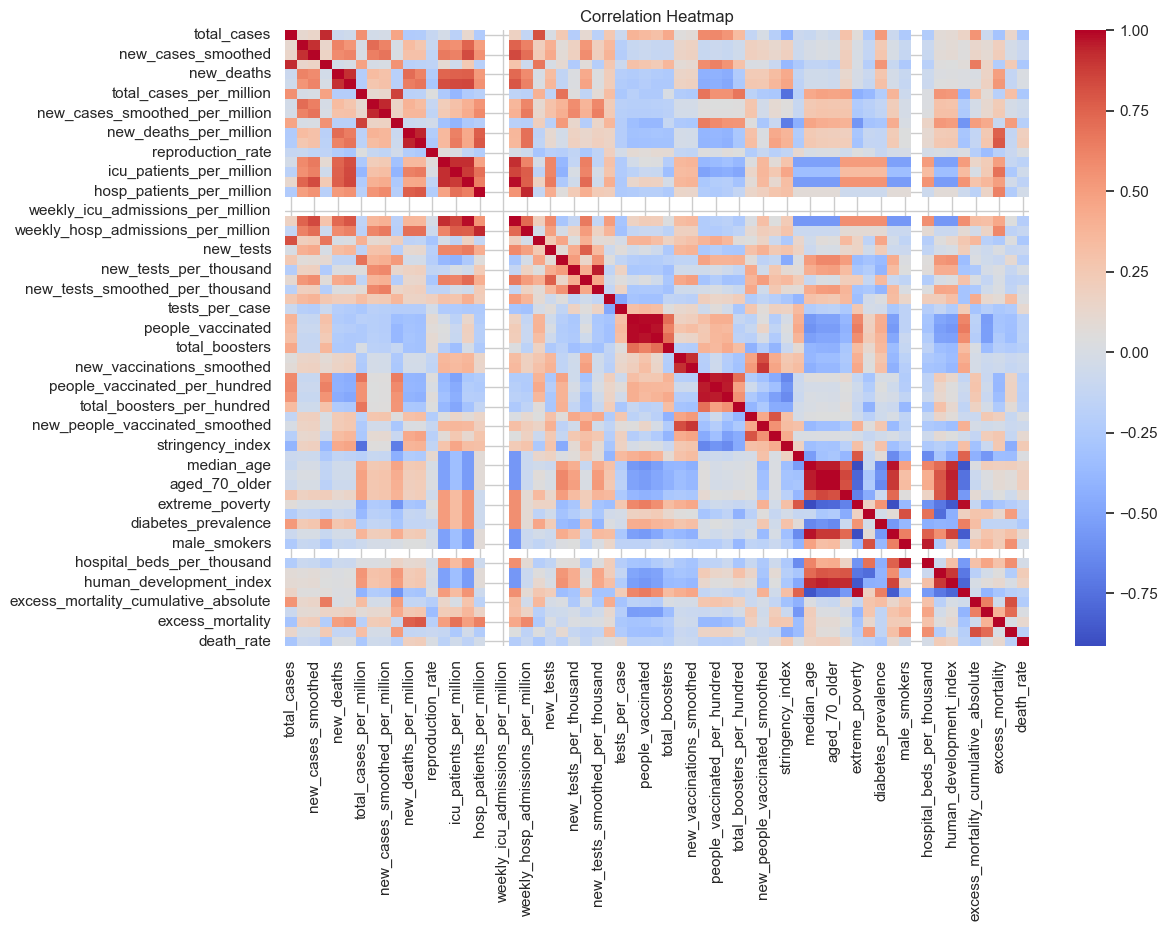

In [18]:
# Compute the correlation matrix for numeric columns
correlation_matrix = filtered_df.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

Task 5:- Visualizing Vaccination Progress.........a)Plot cumulative vaccinations over time for selected countries

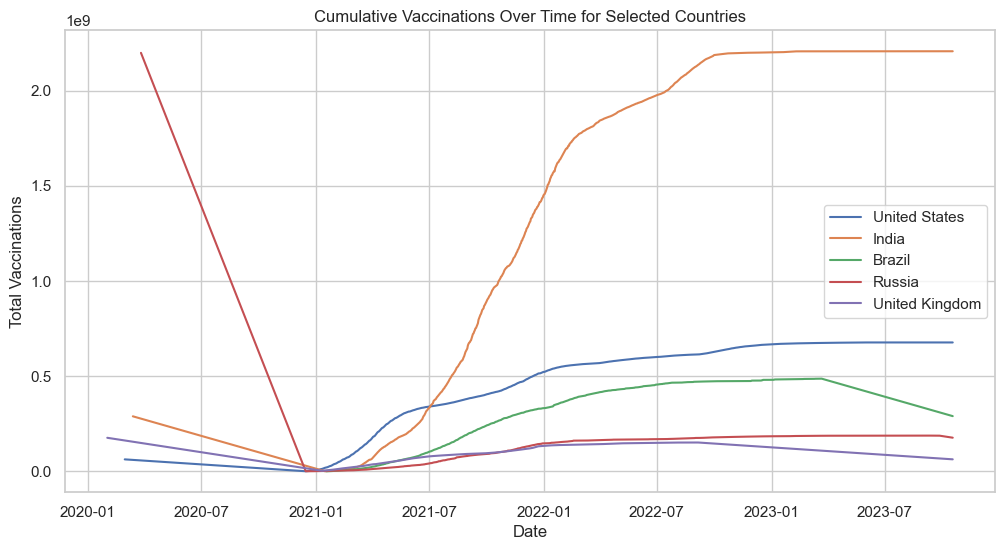

In [19]:
# Plot cumulative vaccinations over time for each country
plt.figure(figsize=(12, 6))
for country in countries_of_interest:
    country_data = filtered_df[filtered_df['location'] == country]
    plt.plot(country_data['date'], country_data['total_vaccinations'], label=country)

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.title('Cumulative Vaccinations Over Time for Selected Countries')
plt.legend()
plt.grid(True)
plt.show()

b)Compare % vaccinated population.

C:\Users\IGNATIUS MAINGI\AppData\Local\Temp\ipykernel_16416\2426898246.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


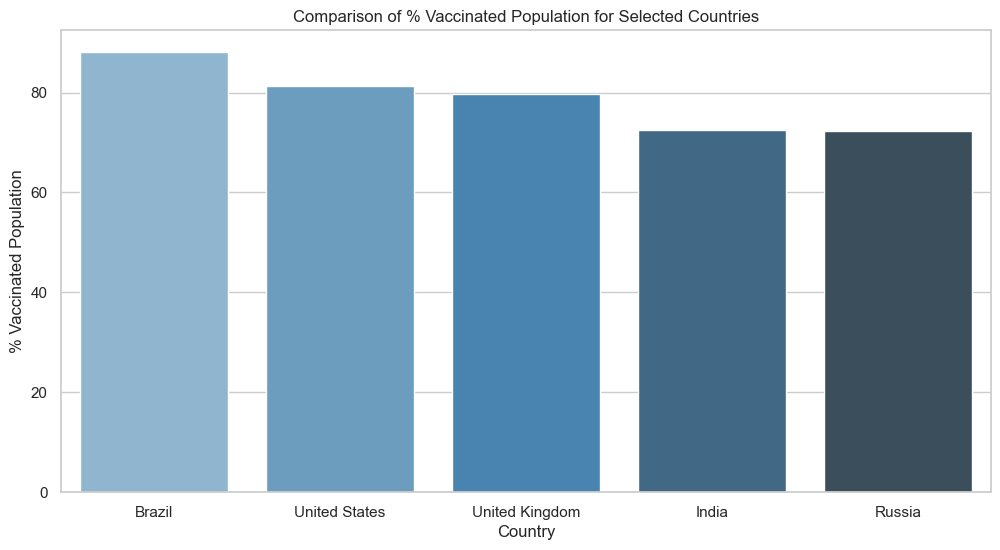

In [20]:
# Compare % vaccinated population for selected countries
plt.figure(figsize=(12, 6))
sns.barplot(
    x=filtered_df[filtered_df['location'].isin(countries_of_interest)]
    .groupby('location')['people_vaccinated_per_hundred']
    .max()
    .sort_values(ascending=False).index,
    y=filtered_df[filtered_df['location'].isin(countries_of_interest)]
    .groupby('location')['people_vaccinated_per_hundred']
    .max()
    .sort_values(ascending=False).values,
    palette="Blues_d"
)
plt.xlabel('Country')
plt.ylabel('% Vaccinated Population')
plt.title('Comparison of % Vaccinated Population for Selected Countries')
plt.show()

Task 6:- Insights & Reporting.....

a)Write 3-5 key insights from the data (e.g., "X country had the fastest vaccine rollout"):-

1.United States Leads in Total Cases: The United States has the highest number of total COVID-19 cases among the selected countries, with over 103 million cases reported.

2.India's Significant Case Count: India follows as the second-highest in total cases, with nearly 45 million cases, showcasing the scale of the pandemic in densely populated regions.

3.Vaccination Progress: Among the selected countries, the percentage of the population vaccinated varies significantly, with some countries achieving over 80% vaccination rates, indicating disparities in vaccine distribution and rollout.

4.Correlation Between GDP and Vaccination: Countries with higher GDP per capita, such as the United States and the United Kingdom, tend to have higher vaccination rates, suggesting economic factors play a role in vaccine accessibility.

5.Mortality Trends: Despite high case counts, the death rate per million varies, with some countries managing to keep mortality rates lower, potentially due to better healthcare infrastructure or early interventions.

b)Highlight anomalies or interesting patterns.

In [22]:
# Highlight anomalies or interesting patterns in the data
# Example: Identify countries with unusually high death rates compared to total cases
filtered_df['death_rate'] = (filtered_df['total_deaths'] / filtered_df['total_cases']) * 100

# Find countries with death rates significantly higher than the average
average_death_rate = filtered_df['death_rate'].mean()
high_death_rate_countries = filtered_df[filtered_df['death_rate'] > average_death_rate + 2 * filtered_df['death_rate'].std()]

# Display the anomalies
print("Countries with unusually high death rates:")
print(high_death_rate_countries[['location', 'death_rate']].drop_duplicates())

Countries with unusually high death rates:
              location  death_rate
328125  United Kingdom  100.000000
328182  United Kingdom   10.466339
328183  United Kingdom   11.316136
328184  United Kingdom   12.222109
328185  United Kingdom   12.809819
...                ...         ...
328370  United Kingdom   11.636267
328371  United Kingdom   11.339920
328372  United Kingdom   11.103804
328373  United Kingdom   10.870823
328374  United Kingdom   10.557412

[194 rows x 2 columns]


### Narrative on COVID-19 Data Analysis

#### Data Overview
The dataset contains comprehensive information on COVID-19 cases, deaths, vaccinations, and other related metrics across various countries. It includes 350,085 rows and 67 columns, with data spanning multiple continents and countries.

#### Key Insights
1. **United States Leads in Total Cases**: The United States has the highest number of total COVID-19 cases among the selected countries, with over 103 million cases reported.
2. **India's Significant Case Count**: India follows as the second-highest in total cases, with nearly 45 million cases, showcasing the scale of the pandemic in densely populated regions.
3. **Vaccination Progress**: Among the selected countries, the percentage of the population vaccinated varies significantly, with some countries achieving over 80% vaccination rates, indicating disparities in vaccine distribution and rollout.
4. **Correlation Between GDP and Vaccination**: Countries with higher GDP per capita, such as the United States and the United Kingdom, tend to have higher vaccination rates, suggesting economic factors play a role in vaccine accessibility.
5. **Mortality Trends**: Despite high case counts, the death rate per million varies, with some countries managing to keep mortality rates lower, potentially due to better healthcare infrastructure or early interventions.

#### Anomalies and Patterns
- **High Death Rates**: Certain countries, such as the United Kingdom, exhibit unusually high death rates compared to the average, which may warrant further investigation into healthcare responses or demographic factors.
- **Vaccination Disparities**: Significant differences in vaccination rates highlight inequities in vaccine distribution, with some countries lagging far behind despite high case counts.

#### Visualizations
- **Line Charts**: Trends in total cases and deaths over time for selected countries reveal the progression of the pandemic and the impact of interventions.
- **Bar Charts**: Top countries by total cases and vaccination rates provide a clear comparison of the pandemic's impact and response.
- **Heatmaps**: Correlation analysis between numeric variables uncovers relationships, such as the link between GDP and vaccination rates.

#### Conclusion
The analysis highlights the global impact of COVID-19, with significant variations in case counts, death rates, and vaccination progress across countries. These insights can inform future pandemic preparedness and response strategies.